In [1]:
# Regularization is a technique used in machine learning to prevent overfitting.
# regularization neglect the values which are making very negligible impact on the data
# like really small values and it helps in learning the more complex features

# there are two types = 

# 1-lasso regularization(L1)
# 2-ridge regularization(L2)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv(r"Housing.csv/Housing.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521  20141013T000000  231300.0         2       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = df.drop(columns="date")

<Axes: >

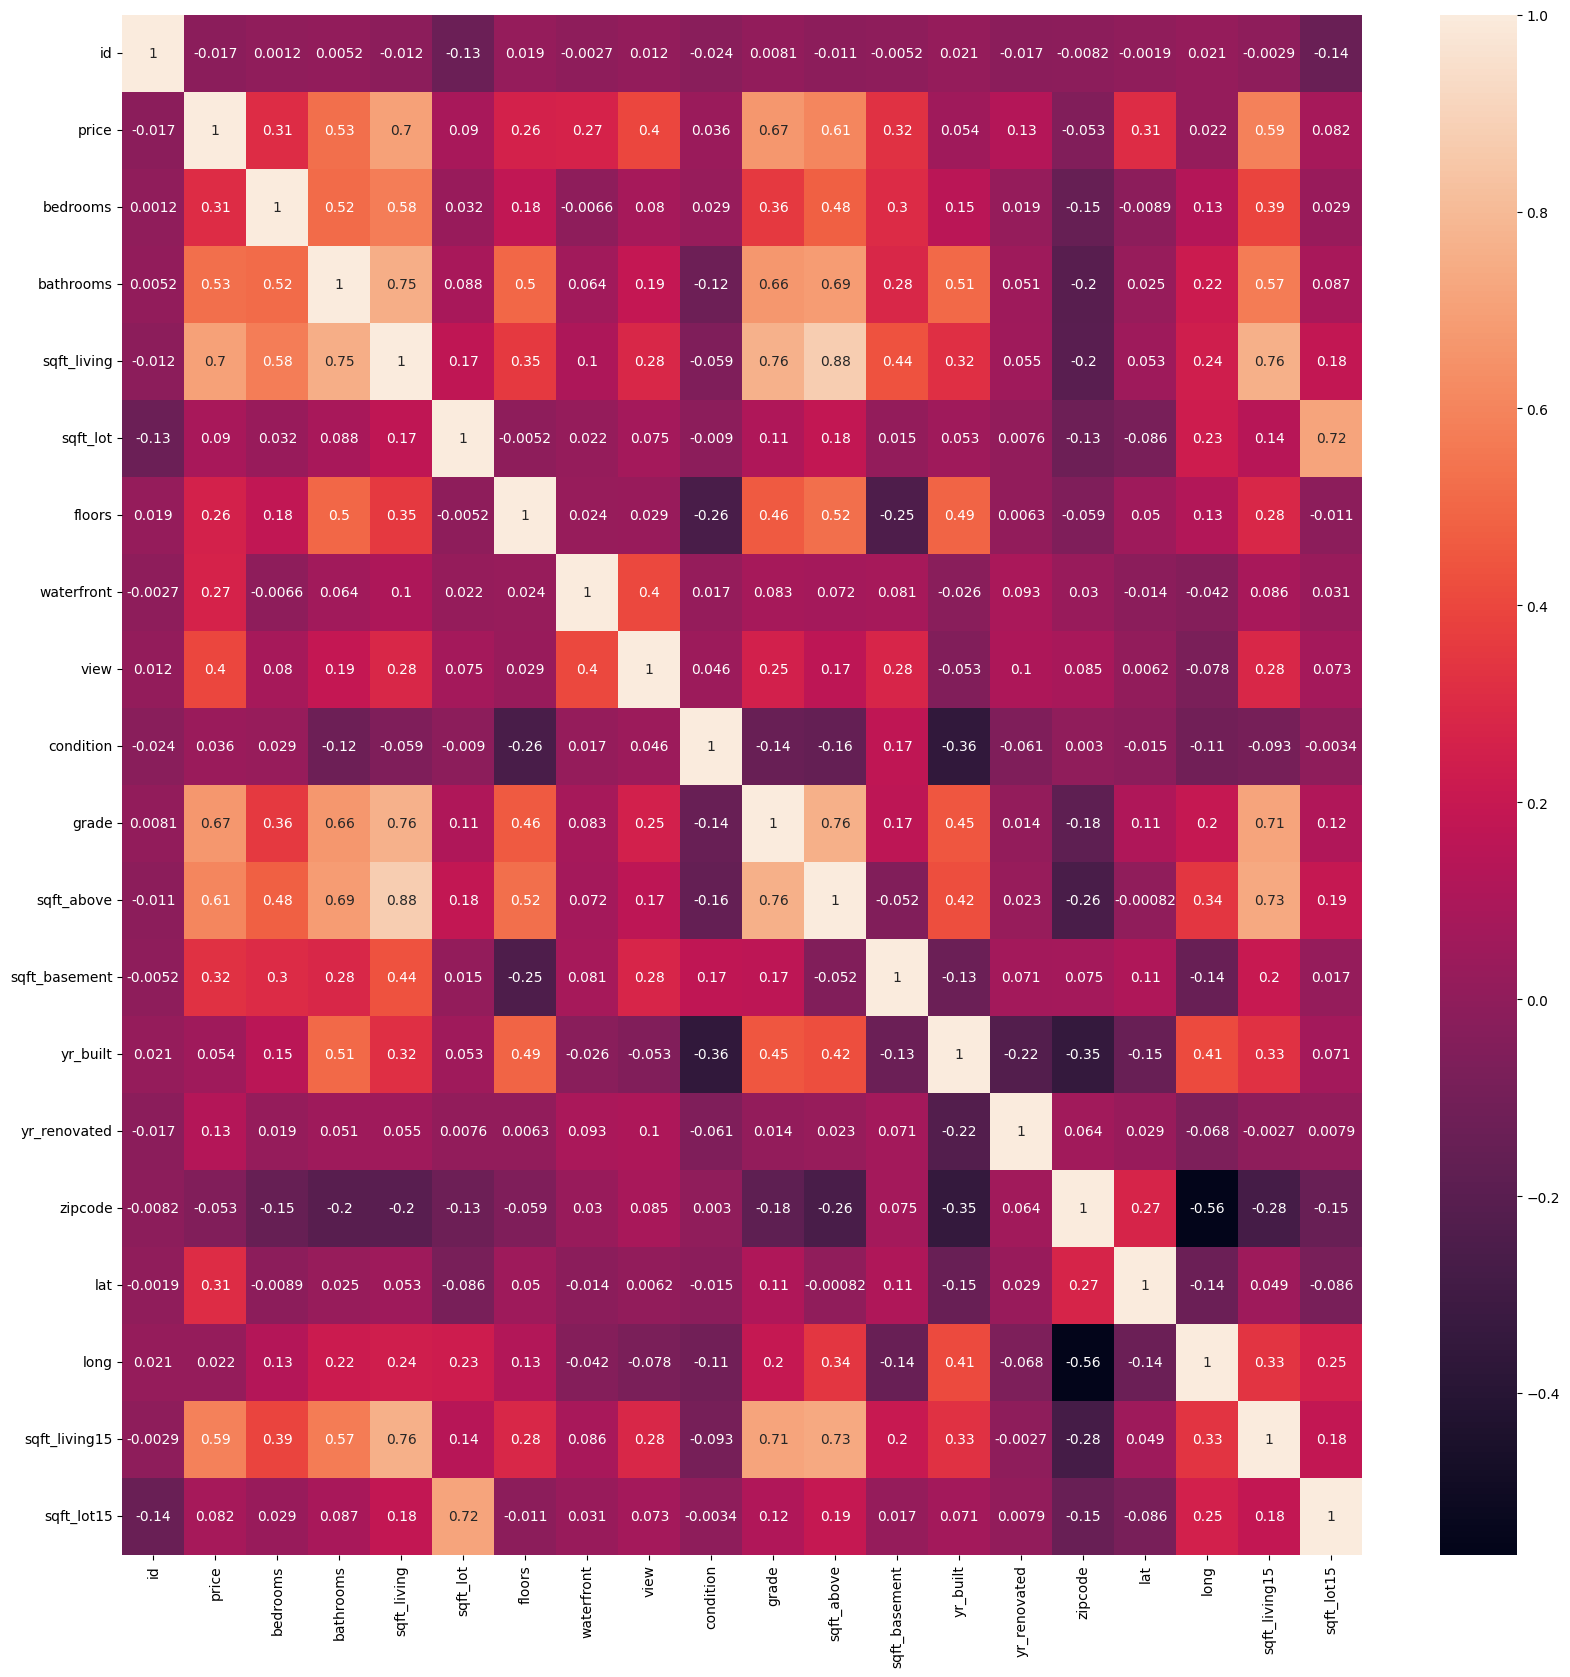

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(data = df.corr() , annot = True)

In [29]:
x = df.drop(columns="price")
y = df['price']

In [35]:
sc = StandardScaler()
sc.fit(x)
# now add this scaled data into your orignal featueres
x = pd.DataFrame(sc.transform(x) , columns=x.columns)
# x

In [34]:
xtrain ,xtest , ytrain ,ytest = train_test_split(x , y , test_size=0.2 , random_state=24)

In [44]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

In [73]:
from sklearn.metrics import mean_absolute_error as mae , mean_squared_error as mse
import numpy as np

# Linear Regression 

In [43]:
lr = LinearRegression()
lr.fit(xtrain , ytrain)
lr.score(xtest , ytest)*100

# the accuracy is low because there is not that much good corelation between the features in our dataset , as we have already seen in heatmap

68.95297295804055

In [80]:
mse(ytest, lr.predict(xtest)), mae(ytest , lr.predict(xtest)) , np.sqrt(mse(ytest, lr.predict(xtest)))  
# this was for linear regression

(46141639493.79874, 127796.85736754512, np.float64(214806.0508779926))

Text(0.5, 1.0, 'Linear Regression')

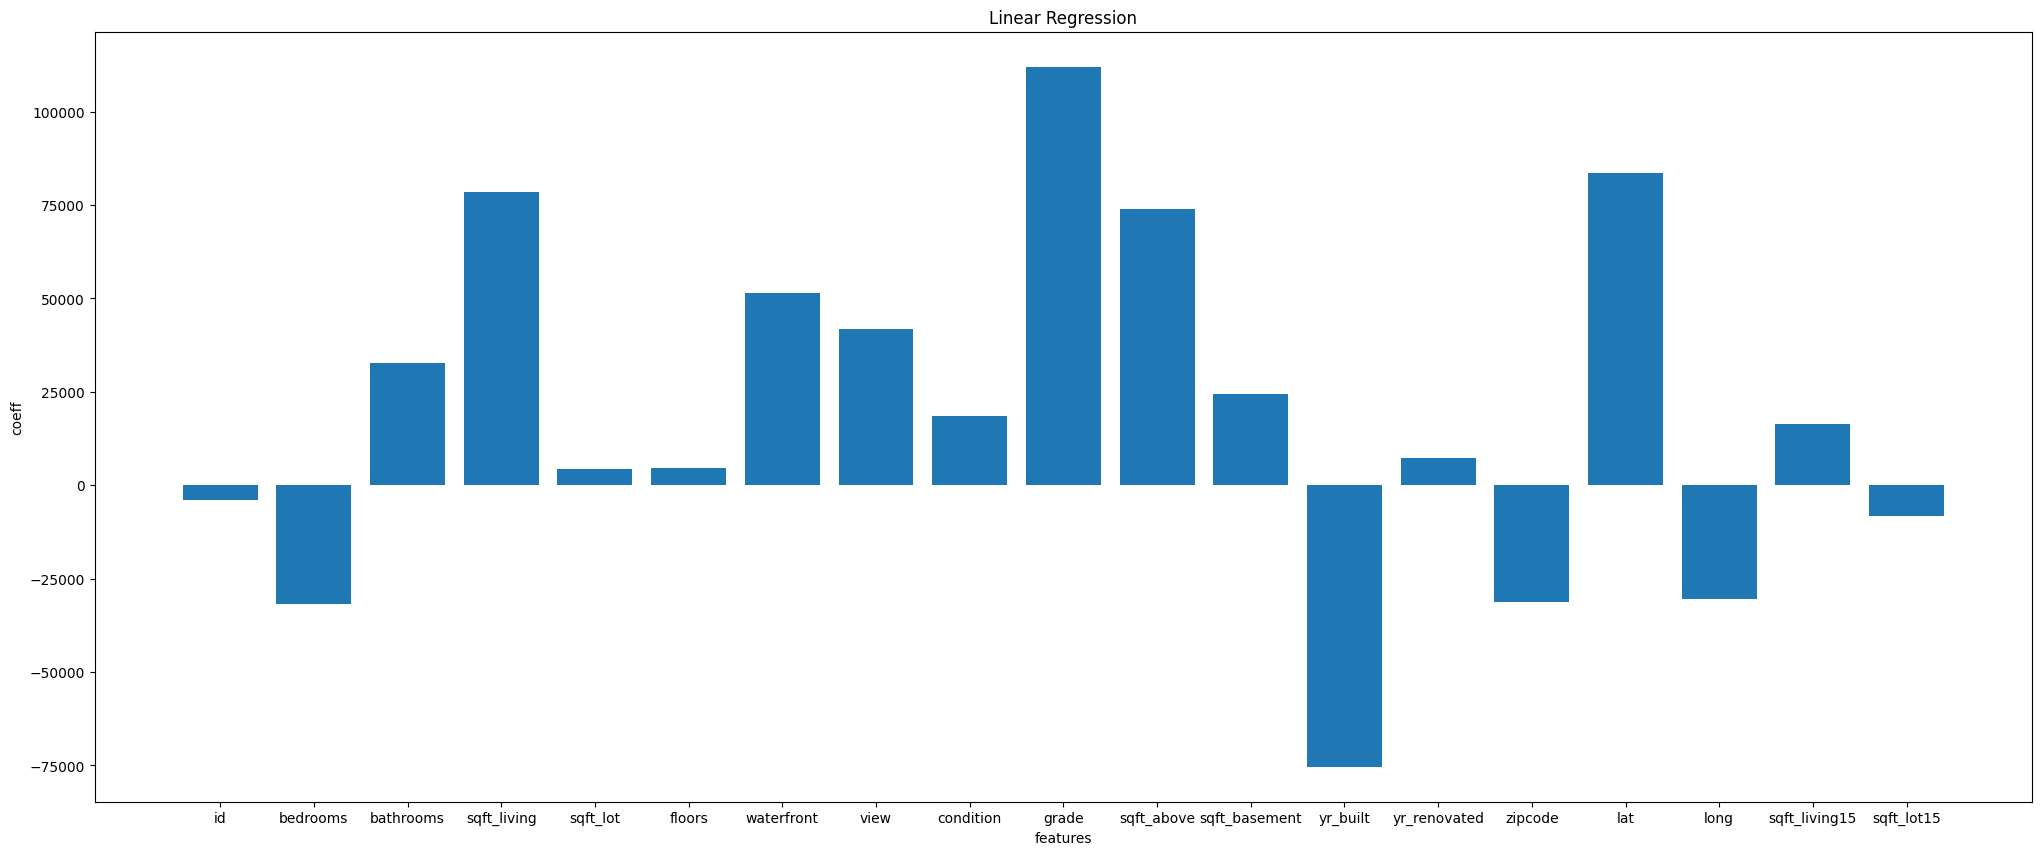

In [53]:
plt.figure(figsize=(25,10))
plt.bar(x.columns , lr.coef_)
plt.xlabel("features")
plt.ylabel("coeff")
plt.title("Linear Regression")

# Lasso

In [66]:
la = Lasso(alpha=10)
la.fit(xtrain,ytrain)

C:\Users\shant\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.959e+13, tolerance: 2.270e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10)

In [60]:
la.score(xtest,ytest)*100 

# not much difference in accuracy than simple linear regression

68.95303558378258

In [81]:
mse(ytest, la.predict(xtest)), mae(ytest , la.predict(xtest)) , np.sqrt(mse(ytest, la.predict(xtest)))  

(46141823861.97281, 127797.00944229295, np.float64(214806.48002789117))

Text(0.5, 1.0, 'lasso Regression')

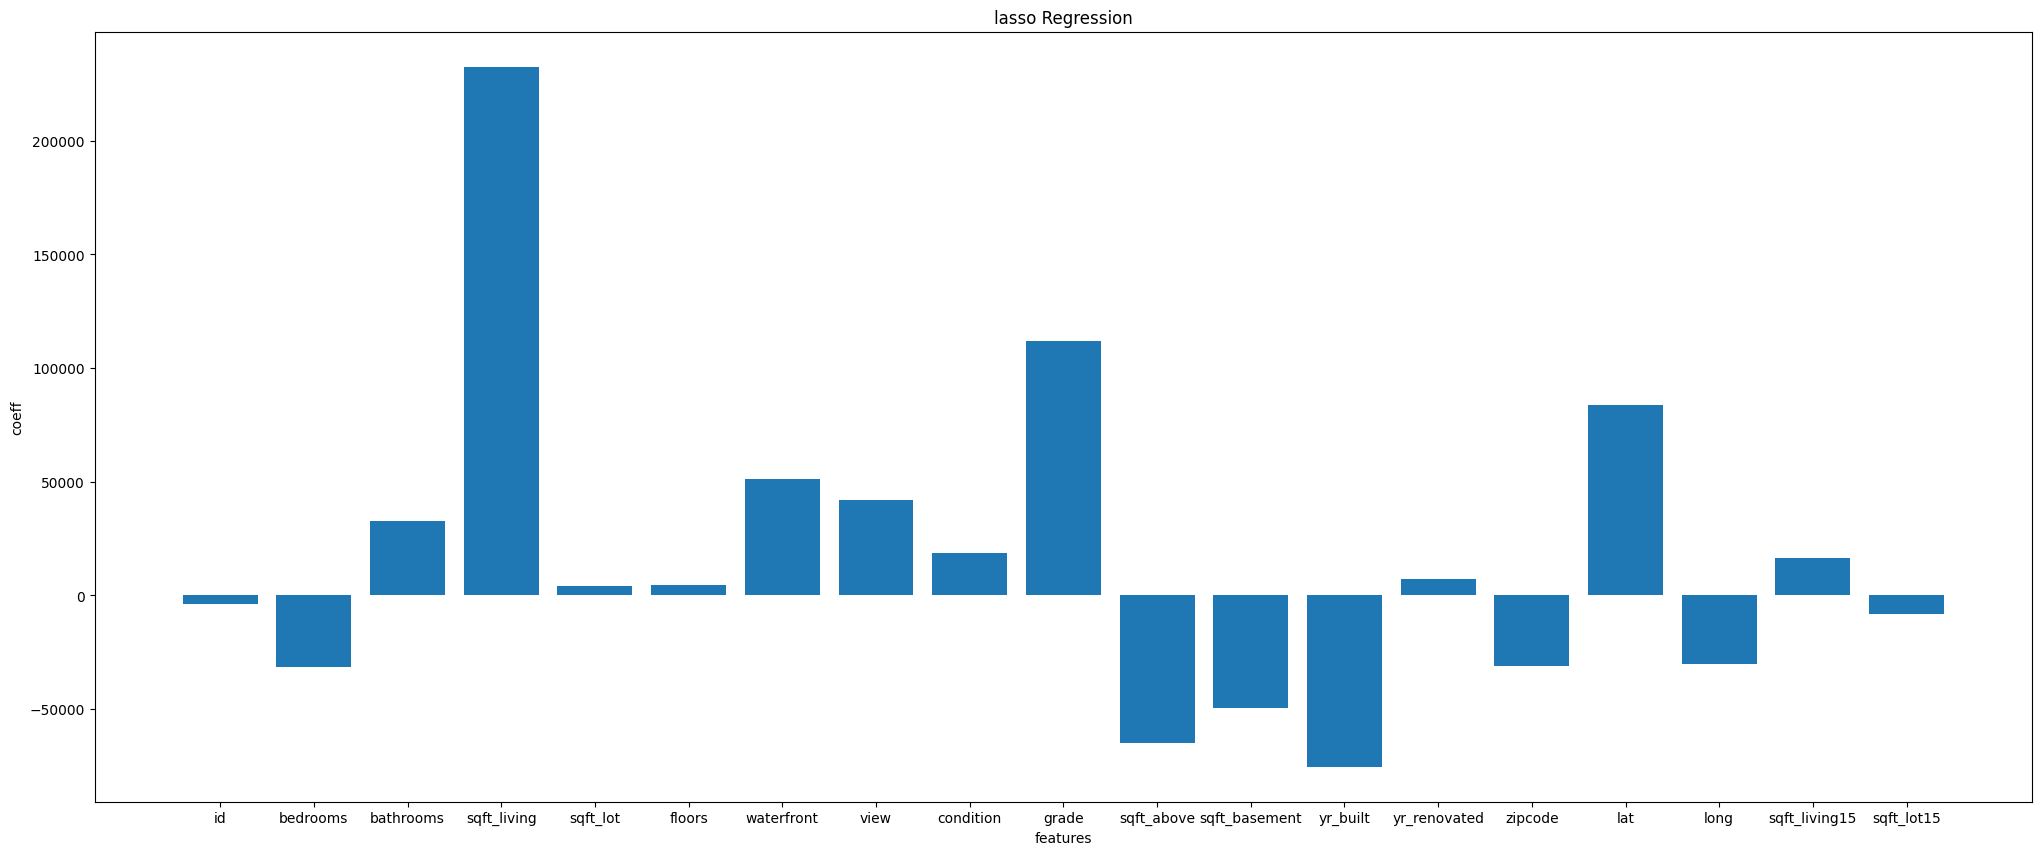

In [67]:
plt.figure(figsize=(25,10))
plt.bar(x.columns , la.coef_)
plt.xlabel("features")
plt.ylabel("coeff")
plt.title("lasso Regression")

# Ridge

In [69]:
ri = Ridge(alpha = 10)
ri.fit(xtrain , ytrain)
ri.score(xtest,ytest)*100

68.95060921755957

In [83]:
mse(ytest, ri.predict(xtest)), mae(ytest , ri.predict(xtest)) , np.sqrt(mse(ytest, ri.predict(xtest)))  
# each of these methods are having the approx same error , but ridge is slightly better

(46146263839.10843, 127779.64383526988, np.float64(214816.81460981688))

Text(0.5, 1.0, 'Ridge Regression')

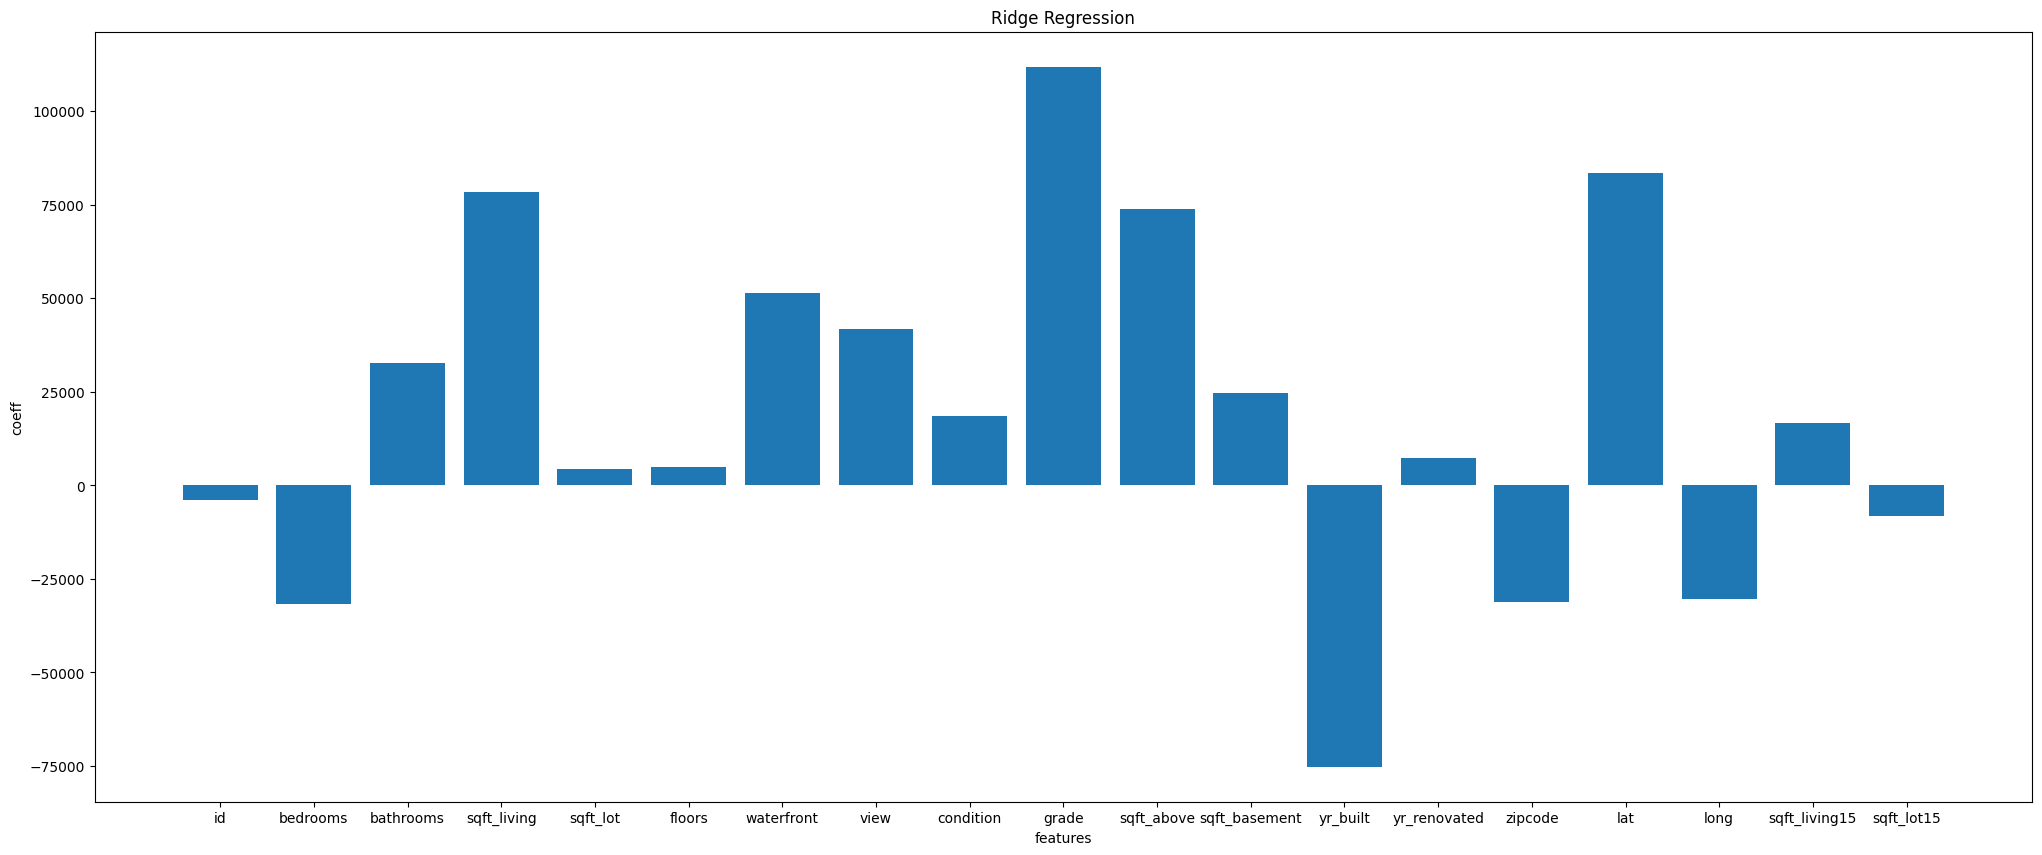

In [70]:
plt.figure(figsize=(25,10))
plt.bar(x.columns , ri.coef_)
plt.xlabel("features")
plt.ylabel("coeff")
plt.title("Ridge Regression")

In [85]:
# lets compare the coeff of all these three methods 
coef_compare = pd.DataFrame({"col_names" : x.columns , "Linear" : lr.coef_ , "Lasso" : la.coef_ , "Ridge" : ri.coef_})
coef_compare.head()

col_names         Linear          Lasso         Ridge
0           id   -3957.320251   -3959.318749  -3965.443704
1     bedrooms  -31685.016276  -31687.334717 -31635.546074
2    bathrooms   32508.105234   32521.097258  32570.235016
3  sqft_living  227855.131779  232589.806722  78422.049026
4     sqft_lot    4295.798589    4301.607016   4332.025804